In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/abhin/Downloads/titanic (1).csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()
#age,cabin,embarked has null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: >

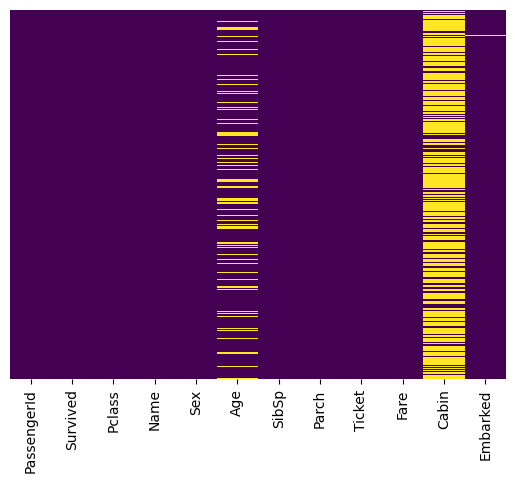

In [4]:
#visual representation of null values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [5]:
# cabin has a lot of null vlaues so it's better to drop it also name will not be useful for our analysis 
# passenger id is also not useful so we will drop it
# Ticket has high cardinality. This can lead to overfitting. So we will drop it as well
#Fare adds a noise to the model so we should drop that as well 
df.drop(['Cabin','Name','Ticket','PassengerId'],axis=1,inplace=True)

In [6]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

Let's fix the null values 

C:\Users\abhin\AppData\Local\Temp\ipykernel_43820\2607861321.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Embarked', data=df, palette='Set2')


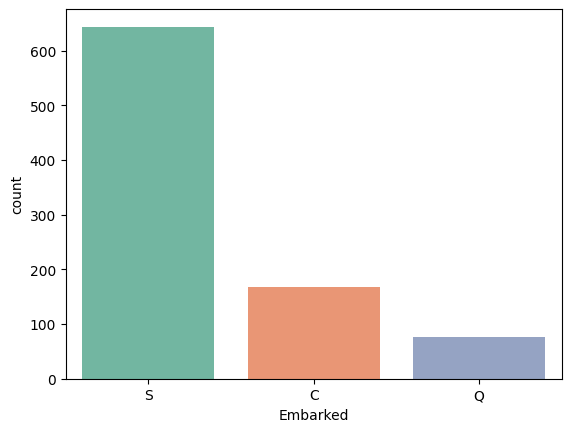

In [7]:
df['Embarked'].value_counts()
sns.countplot(x='Embarked', data=df, palette='Set2')
plt.show()

In [8]:
#as most of the people embarked from S we will fill the missing values with S
df['Embarked'].fillna('S',inplace=True) 

C:\Users\abhin\AppData\Local\Temp\ipykernel_43820\2046360421.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna('S',inplace=True)


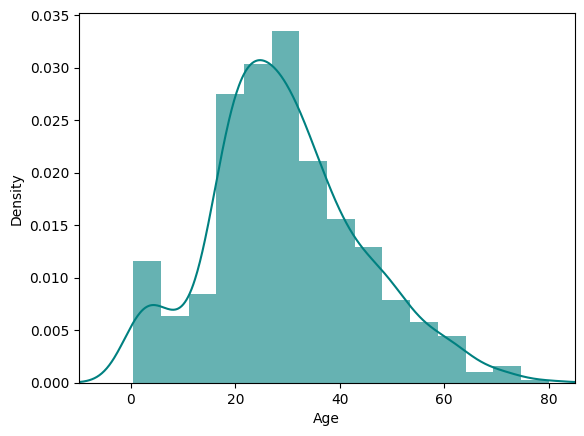

In [9]:
ax = df["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
df["Age"].plot(kind='density', color='teal')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

In [10]:
# Fill the null values in the 'Age' column with the median age as age is right skewed so median is a better choice
df['Age'].fillna(df['Age'].median(), inplace=True)

In [11]:
#X contains every column except the target variable
X = df.drop('Survived',axis=1)
#target variable
Y = df['Survived']

In [12]:
# Set the random seed for reproducibility
np.random.seed(42)

# Shuffle the indices
shuffled_indices = np.random.permutation(len(X))

# Define the split index
split_index = int(len(X) * 0.8)

# Split the indices into training and testing sets
train_indices = shuffled_indices[:split_index]
test_indices = shuffled_indices[split_index:]

# Split the data into training and testing sets
X_train = X.iloc[train_indices]
X_test = X.iloc[test_indices]
Y_train = Y.iloc[train_indices]
Y_test = Y.iloc[test_indices]

# Display the shapes of the resulting datasets
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'Y_train shape: {Y_train.shape}')
print(f'Y_test shape: {Y_test.shape}')

X_train shape: (712, 7)
X_test shape: (179, 7)
Y_train shape: (712,)
Y_test shape: (179,)


In [13]:
object_columns_X_train = X_train.select_dtypes(include=['object']).columns
print(object_columns_X_train)

Index(['Sex', 'Embarked'], dtype='object')


In [14]:
#convert the categorical columns to numerical columns
X_train = pd.get_dummies(X_train, columns=object_columns_X_train, drop_first=True)
X_test = pd.get_dummies(X_test, columns=object_columns_X_train, drop_first=True)
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)
X_train

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
709,3,28.00,1,1,15.2458,True,False,False
439,2,31.00,0,0,10.5000,True,False,True
840,3,20.00,0,0,7.9250,True,False,True
720,2,6.00,0,1,33.0000,False,False,True
39,3,14.00,1,0,11.2417,False,False,False
...,...,...,...,...,...,...,...,...
505,1,18.00,1,0,108.9000,True,False,False
639,3,28.00,1,0,16.1000,True,False,True
878,3,28.00,0,0,7.8958,True,False,True
824,3,2.00,4,1,39.6875,True,False,True


In [15]:
# Replace True with 1 and False with 0 in all encoded columns
X_train = X_train.astype(int)
X_test = X_test.astype(int)

# Display the updated X_train and X_test
print(X_train.head())
print(X_test.head())

     Pclass  Age  SibSp  Parch  Fare  Sex_male  Embarked_Q  Embarked_S
709       3   28      1      1    15         1           0           0
439       2   31      0      0    10         1           0           1
840       3   20      0      0     7         1           0           1
720       2    6      0      1    33         0           0           1
39        3   14      1      0    11         0           0           0
     Pclass  Age  SibSp  Parch  Fare  Sex_male  Embarked_Q  Embarked_S
619       2   26      0      0    10         1           0           1
761       3   41      0      0     7         1           0           1
645       1   48      1      0    76         1           0           0
754       2   48      1      2    65         0           0           1
556       1   48      1      0    39         0           0           0


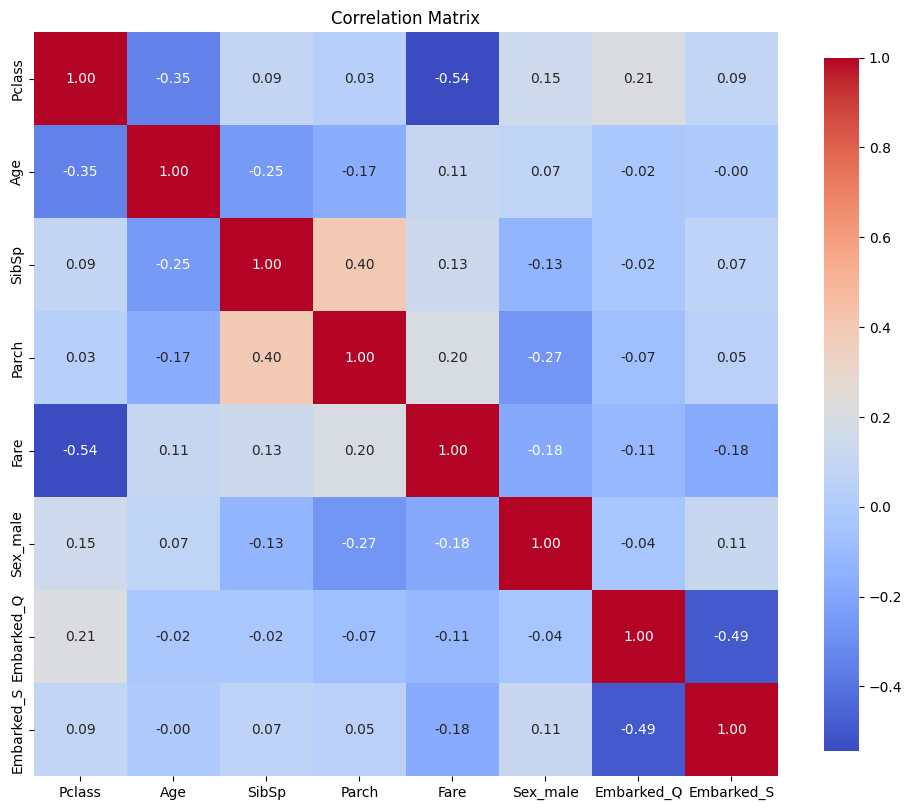

In [16]:
# Select only the numerical columns from X_train
X_train_num = X_train.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = X_train_num.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .9})
plt.title('Correlation Matrix')
plt.show()

There is no highly correlated feature which suggests that this is a linearly seperable data and we don't have to use any kernel functions to transform our data but we will see later

In [17]:
# Standardize the data
# now the range of this data is [-1,1]
#Step 1
X_train = (X_train - X_train.mean()) / X_train.std()
X_test = (X_test - X_test.mean()) / X_test.std()
print(X_train)

       Pclass       Age     SibSp     Parch      Fare  Sex_male  Embarked_Q  \
709  0.824654 -0.090461  0.445182  0.705697 -0.335833  0.741906   -0.308627   
439 -0.376069  0.133958 -0.481630 -0.493483 -0.431326  0.741906   -0.308627   
840  0.824654 -0.688910 -0.481630 -0.493483 -0.488621  0.741906   -0.308627   
720 -0.376069 -1.736197 -0.481630  0.705697  0.007940 -1.345987   -0.308627   
39   0.824654 -1.137747  0.445182 -0.493483 -0.412227 -1.345987   -0.308627   
..        ...       ...       ...       ...       ...       ...         ...   
505 -1.576792 -0.838523  0.445182 -0.493483  1.440328  0.741906   -0.308627   
639  0.824654 -0.090461  0.445182 -0.493483 -0.316735  0.741906   -0.308627   
878  0.824654 -0.090461 -0.481630 -0.493483 -0.488621  0.741906   -0.308627   
824  0.824654 -2.035422  3.225620  0.705697  0.122531  0.741906   -0.308627   
803  0.824654 -2.185034 -0.481630  0.705697 -0.469523  0.741906   -0.308627   

     Embarked_S  
709   -1.593335  
439    0.626733

In [18]:
# Step 2: Compute the covariance matrix
cov_matrix = np.cov(X_train.T)

# Step 3: Compute the eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Step 4: Sort the eigenvalues and eigenvectors
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Display the sorted eigenvalues and eigenvectors
print("Sorted Eigenvalues:")
print(sorted_eigenvalues)
print("\nSorted Eigenvectors:")
print(sorted_eigenvectors)


Sorted Eigenvalues:
[1.82816323 1.72208263 1.52677109 0.82980864 0.74544195 0.57413511
 0.41448109 0.35911626]

Sorted Eigenvectors:
[[ 0.56509589 -0.33912997 -0.05858169 -0.05738152 -0.12698555 -0.11605732
  -0.07739725  0.723428  ]
 [-0.1796262   0.50371535  0.06379769 -0.06420976 -0.78634948  0.08203527
   0.10725245  0.26312327]
 [-0.16982863 -0.54428977  0.01613064  0.41718533 -0.25361039  0.63072119
   0.19587224 -0.0104736 ]
 [-0.29058952 -0.51239951  0.01578967 -0.0116999  -0.38956134 -0.68180482
   0.0288446  -0.18753777]
 [-0.61106718  0.0530596  -0.07705929  0.31513916  0.23973048 -0.08070704
  -0.4501225   0.50193243]
 [ 0.34175924  0.24029954  0.20366715  0.83100288 -0.04621441 -0.27527014
  -0.00275611 -0.12447346]
 [ 0.19054902  0.0062352  -0.67873436  0.06054689 -0.26421025  0.10298635
  -0.57963517 -0.28795097]
 [ 0.09276649 -0.1088992   0.69562185 -0.15766919 -0.14156047  0.15569332
  -0.63617123 -0.14762248]]


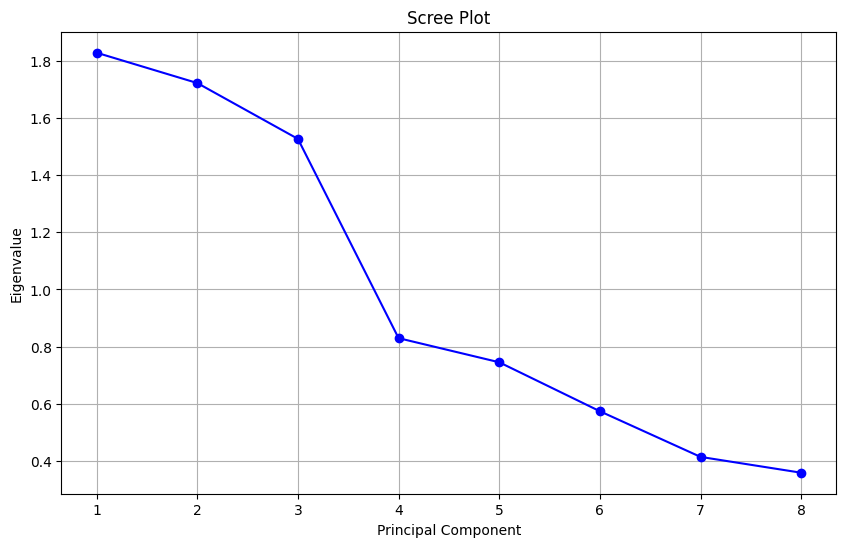

In [19]:
# Create a scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(sorted_eigenvalues) + 1), sorted_eigenvalues, 'o-', color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.xticks(range(1, len(sorted_eigenvalues) + 1))
plt.grid(True)
plt.show()

In [31]:
# Step 5: Select first 4 eigenvectors (principal components)
n_components = 4
selected_eigenvectors = sorted_eigenvectors[:, :n_components]

# Step 6: Transform the data using the selected eigenvectors
# Final data set = Principal components * standardized original dataset
X_train_pca = X_train.dot(selected_eigenvectors)
X_test_pca = X_test.dot(selected_eigenvectors)

# Calculate the explained variance ratio for each principal component
explained_variance_ratio = sorted_eigenvalues[:8] / np.sum(sorted_eigenvalues)

# Print the explained variance ratio
for i, ratio in enumerate(explained_variance_ratio):
    print(f"Principal Component {i+1}: {ratio:.2f} of the variance")

Principal Component 1: 0.23 of the variance
Principal Component 2: 0.22 of the variance
Principal Component 3: 0.19 of the variance
Principal Component 4: 0.10 of the variance
Principal Component 5: 0.09 of the variance
Principal Component 6: 0.07 of the variance
Principal Component 7: 0.05 of the variance
Principal Component 8: 0.04 of the variance


In [21]:
#My code 
# class SVM:
#     def __init__(self, learning_rate=0.017, lambda_param=0.1, n_iters=700):
#         self.lr = learning_rate
#         self.lambda_param = lambda_param
#         self.n_iters = n_iters
#         self.w = None
#         self.b = None
#         self.costs = []

#     def fit(self, X, y):
#         y = np.array(y)
#         X = np.array(X)
#         n_samples, n_features = X.shape
#         y_ = np.where(y <= 0, -1, 1)  # if y <= 0 then -1 else 1

#         # initialize weights and bias
#         self.w = np.zeros(n_features)
#         self.b = 0

#         for _ in range(self.n_iters):
#             for idx, x_i in enumerate(X):
#                 condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
#                 if condition:
#                     self.w -= self.lr * (2 * self.lambda_param * self.w)
#                 else:
#                     self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
#                     self.b -= self.lr * y_[idx]

#             # Compute the cost (hinge loss)
#             hinge_loss = np.maximum(0, 1 - y_ * (np.dot(X, self.w) + self.b))
#             cost = (1 / n_samples) * np.sum(hinge_loss) + (self.lambda_param/2) * np.sum(self.w ** 2)
#             self.costs.append(cost)
#             # cost = (1 / n_samples) * np.sum(np.maximum(0, 1 - y * (np.dot(X, self.weights) + self.bias))) + (self.reg_strength / 2) * np.sum(self.weights ** 2)

#     def predict(self, X):
#         approx = np.dot(X, self.w) - self.b
#         return np.sign(approx)
class SVM:
    def __init__(self, learning_rate=0.01, lambda_param=0.1, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None
        self.costs = []

    def fit(self, X, y):
        y = np.array(y)
        X = np.array(X)
        n_samples, n_features = X.shape
        y_ = np.where(y <= 0, -1, 1)  # Convert y <= 0 to -1, else 1

        # Initialize weights and bias
        self.w = np.zeros(n_features)
        self.b = 0

        # Iterate through all the epochs
        for _ in range(self.n_iters):
            # Calculate the linear output
            linear_output = np.dot(X, self.w) + self.b

            # Compute hinge loss (SVM loss function)
            distances = 1 - y_ * linear_output
            dw = np.zeros(n_features)
            db = 0

            # Compute gradients for each sample
            for i in range(n_samples):
                if distances[i] > 0:  # Misclassified sample
                    dw += -y_[i] * X[i]
                    db += -y_[i]

            # Regularization term for weights
            dw = dw / n_samples + (self.lambda_param * self.w / n_samples)
            db = db / n_samples

            # Update weights and bias using gradient descent
            self.w -= self.lr * dw
            self.b -= self.lr * db

            # Compute the cost (hinge loss + regularization)
            hinge_loss = np.maximum(0, 1 - y_ * (np.dot(X, self.w) + self.b))
            cost = (1 / n_samples) * np.sum(hinge_loss) + (self.lambda_param / 2) * np.sum(self.w ** 2)
            self.costs.append(cost)

    def predict(self, X):
        # Prediction step (sign of the linear output)
        linear_output = np.dot(X, self.w) + self.b
        return np.sign(linear_output)


SVM on data without PCA

In [22]:
svm = SVM()
svm.fit(X_train, Y_train)
predictions = svm.predict(X_test)
print(predictions)

[-1. -1. -1.  1.  1. -1.  1.  1. -1. -1. -1. -1. -1.  1. -1.  1.  1. -1.
 -1. -1. -1.  1. -1. -1. -1. -1.  1. -1. -1. -1. -1. -1. -1.  1.  1.  1.
 -1.  1. -1. -1.  1.  1.  1. -1.  1.  1.  1. -1. -1. -1. -1.  1. -1. -1.
 -1. -1. -1. -1. -1.  1. -1. -1. -1. -1.  1. -1.  1. -1.  1.  1.  1. -1.
 -1. -1.  1.  1.  1.  1. -1. -1. -1. -1. -1.  1.  1. -1. -1.  1.  1. -1.
  1. -1.  1. -1.  1. -1. -1. -1. -1.  1.  1. -1. -1. -1.  1. -1. -1. -1.
  1. -1.  1. -1. -1.  1.  1. -1.  1. -1.  1.  1.  1. -1.  1. -1. -1. -1.
 -1. -1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1. -1.  1.
 -1. -1. -1. -1. -1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.
 -1. -1. -1.  1.  1. -1. -1. -1. -1. -1.  1.  1.  1. -1. -1.  1. -1.]


In [23]:
TP = np.sum((predictions == 1) & (Y_test == 1))
TN = np.sum((predictions == -1) & (Y_test == 0))
FP = np.sum((predictions == 1) & (Y_test == 0))
FN = np.sum((predictions == -1) & (Y_test == 1))
# Calculate accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Calculate precision
precision = TP / (TP + FP)

# Calculate recall
recall = TP / (TP + FN)

# Caculate F1 score
f1 = 2 * (precision * recall) / (precision + recall)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.8100558659217877
Precision: 0.7540983606557377
Recall: 0.7076923076923077
F1 Score: 0.7301587301587301


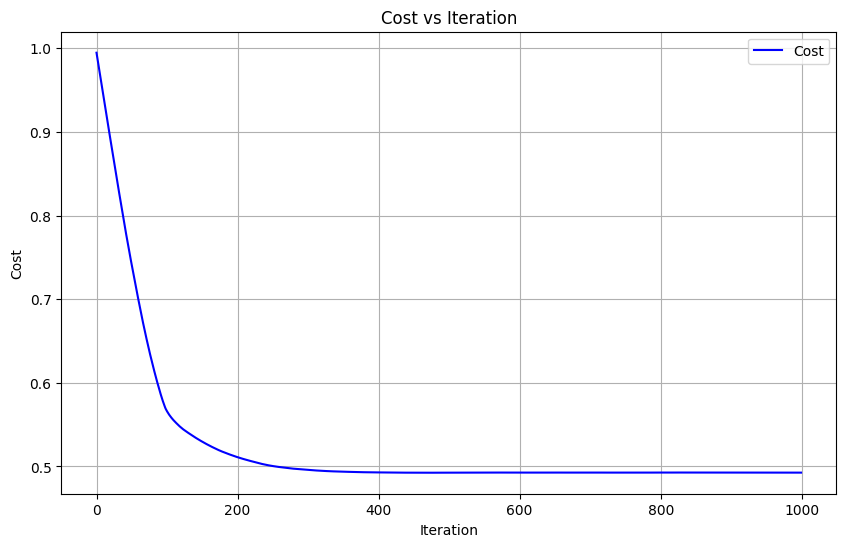

In [24]:
# Plot the cost vs iteration
plt.figure(figsize=(10, 6))
plt.plot(range(len(svm.costs)), svm.costs, 'b-', label='Cost')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost vs Iteration')
plt.legend()
plt.grid(True)
plt.show()

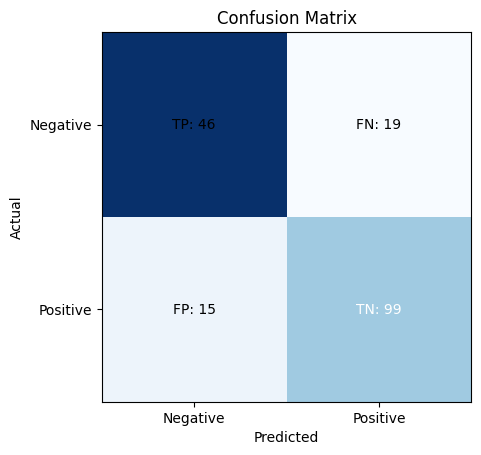

In [25]:
def confusion_matrix(TP, FP, TN, FN):
    data = [[TN, FP], [FN, TP]]
    plt.imshow(data, cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.xticks([0, 1], ['Negative', 'Positive'])
    plt.yticks([0, 1], ['Negative', 'Positive'])

    for i in range(2):
        for j in range(2):
            if i == 0 and j == 0:
                plt.text(j, i, f'TP: {TP}', ha='center', va='center', color='black')
            elif i == 0 and j == 1:
                plt.text(j, i, f'FN: {FN}', ha='center', va='center', color='black')
            elif i == 1 and j == 0:
                plt.text(j, i, f'FP: {FP}', ha='center', va='center', color='black')
            elif i == 1 and j == 1:
                plt.text(j, i, f'TN: {TN}', ha='center', va='center', color='white')
              

confusion_matrix(TP, FP, TN, FN)

SVM on data with PCA 

In [26]:
svmwithpca = SVM()  
svmwithpca.fit(X_train_pca, Y_train)
predictions = svmwithpca.predict(X_test_pca)
print(predictions)

[-1. -1. -1.  1.  1. -1.  1.  1. -1. -1. -1. -1. -1.  1. -1.  1.  1. -1.
 -1. -1. -1.  1. -1. -1. -1. -1.  1. -1. -1. -1. -1. -1. -1.  1.  1.  1.
 -1.  1. -1. -1.  1.  1.  1. -1.  1.  1.  1. -1. -1. -1. -1.  1. -1. -1.
 -1. -1. -1. -1. -1.  1. -1. -1. -1. -1.  1. -1.  1. -1.  1.  1.  1. -1.
 -1. -1.  1.  1.  1.  1. -1. -1. -1. -1. -1.  1.  1. -1. -1.  1.  1. -1.
  1. -1.  1. -1.  1. -1. -1. -1. -1.  1.  1. -1. -1. -1.  1. -1. -1. -1.
  1. -1.  1. -1. -1.  1.  1. -1.  1.  1.  1.  1.  1. -1.  1. -1. -1. -1.
 -1. -1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1. -1.  1.
 -1. -1. -1. -1. -1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.
 -1. -1. -1.  1.  1. -1. -1. -1. -1. -1.  1.  1.  1. -1. -1.  1. -1.]


In [27]:
TP = np.sum((predictions == 1) & (Y_test == 1))
TN = np.sum((predictions == -1) & (Y_test == 0))
FP = np.sum((predictions == 1) & (Y_test == 0))
FN = np.sum((predictions == -1) & (Y_test == 1))
# Calculate accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Calculate precision
precision = TP / (TP + FP)

# Calculate recall
recall = TP / (TP + FN)

# Caculate F1 score
f1 = 2 * (precision * recall) / (precision + recall)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.8044692737430168
Precision: 0.7419354838709677
Recall: 0.7076923076923077
F1 Score: 0.7244094488188977


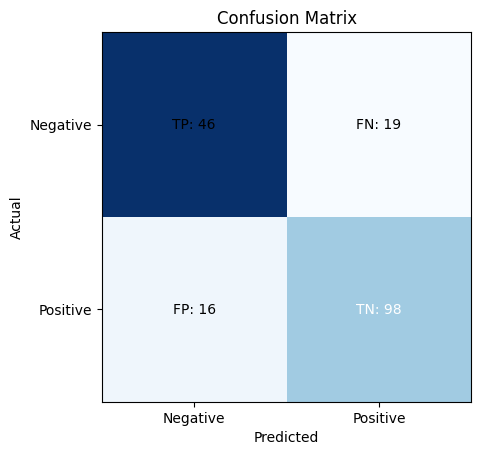

In [28]:
confusion_matrix(TP, FP, TN, FN)